<h1 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);"> A. Mnist資料預處理(Preprocess) </h1>

## (一)匯入模組與資料

### 1.匯入相關模組

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


### 2.匯入keras模組與Mnist資料

In [2]:
from keras.datasets import mnist

### 3.讀取檔案

In [3]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
# C:\Users\kbjiyu-NB\.keras

## (二)查看訓練資料

### 1.查看Mnist資料

In [4]:
print('x_train_image:', len(x_train_image),x_train_image.shape)
print('x_test_image:',len(x_test_image), x_test_image.shape)

x_train_image: 60000 (60000, 28, 28)
x_test_image: 10000 (10000, 28, 28)


### 2. 查看images的func

In [6]:
import matplotlib.pyplot as plt 
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images, labels, 
                                  prediction, idx, num=10): #(影像, 真實值, 預測結果, 資料開始index, 顯示筆數)
    fig = plt.gcf() #圖初始
    fig.set_size_inches(12, 14) #圖大小
    if num>25: 
        num=25 #筆數限制
    for i in range(0, num):  
        ax = plt.subplot(5, 5, 1+i) #subgraph大小，位置(5行, 5列, 1開始位置)
        ax.imshow(images[idx], cmap='binary') #畫出subgraph
        title= "lable=" + str(labels[idx]) #subgraph title
        if len(prediction)>0:
            title+=",prediction="+str(prediction[idx]) #subgraph title with prediction
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx +=1
    plt.show()

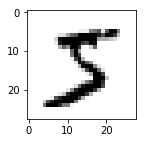

In [7]:
# plot single graph
plot_image(x_train_image[0])

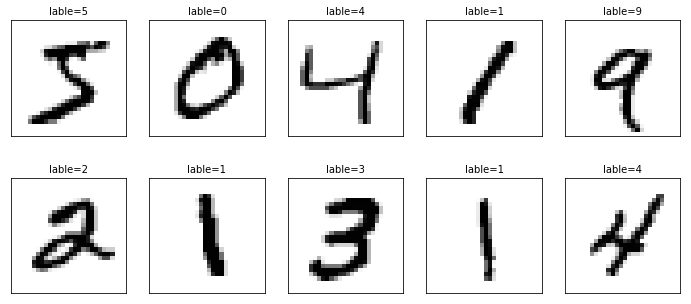

In [8]:
# plot multi graphs
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

## (三)資料預處理

### 1.fetures(影像特徵值)資料預處理

#### (1) 查看原有資料格式

In [9]:
print(x_train_image.shape)
print(x_test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


#### (2) 將28x28,轉為1x784之一維向量，並以astype轉為float32，784個數字

In [10]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

#### (3) 查看轉換後資料格式與資料內容

In [11]:
print(x_Train.shape)
print(x_Test.shape)
# print(x_Train[0])

(60000, 784)
(10000, 784)


#### (4) 資料標準化

In [12]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

### 2.labels(真實標籤特徵值)資料預處理

#### (1)查看原有資料格式

In [13]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

#### (2) 將label進行One-hot encoding轉換

In [14]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

#### (3) 查看轉換後資料格式與資料內容

In [15]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

<h1 style="background-image: linear-gradient( 135deg, #FDD819 10%, #E80505 100%);"> B.建立模型(Model Building)</h1>

## (一)模型架構
<pre>
建立多層感知器(Multilayer perceptron)
輸入層(x)  : 784 
激活函數   : relu 
隱藏層(h1) : 1000  > DropOut(0.5)
激活函數   : relu
隱藏層(h2) : 1000  > DropOut(0.5)
激活函數   : softmax
輸出層(y)  : 10
</pre>

## (二) 建立模型

### 1.匯入模組

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

### 2.建立Sequential模型

In [17]:
model = Sequential()

### 3.建構模型內各層

#### (1)輸入層與隱藏層

In [18]:
model.add(Dense(units=1000,  #隱藏層神經元1000個
                input_dim=784, #輸入層神經元784個
                kernel_initializer='normal', #使用normal distribution常態分佈之亂數，初始化weight與bias
                activation='relu')) #激活函數為relu

In [19]:
model.add(Dropout(0.5))

In [20]:
model.add(Dense(units=1000,
                kernel_initializer='normal',
                activation='relu')) 

In [21]:
model.add(Dropout(0.5))

#### (2)建立輸出層

In [22]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

#### (3)查看模型摘要

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


<h1 style="background-image: linear-gradient( 135deg, #FAD7A1 10%, #E96D71 100%);"> C.訓練模型 </h1>

## (一)定義訓練方式

In [24]:
model.compile(loss='categorical_crossentropy', #設定loss function, 在深度學習常使用cross_entropy交叉熵，炫練效果較好。
              optimizer='adam', #設定訓練時的最優化方法，在深度學習使用adam最優化方法，可以讓訓練更快收斂，並提高準確率。
              metrics=['accuracy']) #設定評估模型的方式為accuracy準確率

## (二)開始訓練

In [25]:
train_history = model.fit(x=x_Train_normalize, #設定input X。
                          y=y_TrainOneHot, #設定output Y。
                          validation_split=0.2, #設定keras將資料分為80%訓練用(60000*0.8 =48000)，20%驗證用(12000)。
                          epochs=10, #設定訓練週期(輪epoch)10次。
                          batch_size=200, #每一批次200筆資料。所以一輪(1 epoch)大概會有(48000/200=240批次)
                          verbose=2) #顯示訓練過程。


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3679 - acc: 0.8843 - val_loss: 0.1354 - val_acc: 0.9605
Epoch 2/10
 - 1s - loss: 0.1576 - acc: 0.9519 - val_loss: 0.0993 - val_acc: 0.9703
Epoch 3/10
 - 1s - loss: 0.1169 - acc: 0.9632 - val_loss: 0.0889 - val_acc: 0.9723
Epoch 4/10
 - 1s - loss: 0.0978 - acc: 0.9705 - val_loss: 0.0824 - val_acc: 0.9748
Epoch 5/10
 - 1s - loss: 0.0854 - acc: 0.9733 - val_loss: 0.0811 - val_acc: 0.9768
Epoch 6/10
 - 1s - loss: 0.0751 - acc: 0.9766 - val_loss: 0.0739 - val_acc: 0.9763
Epoch 7/10
 - 1s - loss: 0.0620 - acc: 0.9797 - val_loss: 0.0751 - val_acc: 0.9771
Epoch 8/10
 - 1s - loss: 0.0588 - acc: 0.9812 - val_loss: 0.0804 - val_acc: 0.9785
Epoch 9/10
 - 1s - loss: 0.0574 - acc: 0.9815 - val_loss: 0.0713 - val_acc: 0.9798
Epoch 10/10
 - 1s - loss: 0.0515 - acc: 0.9829 - val_loss: 0.0729 - val_acc: 0.9794


## (三)顯示訓練過程

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_train_history(train_histroy, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

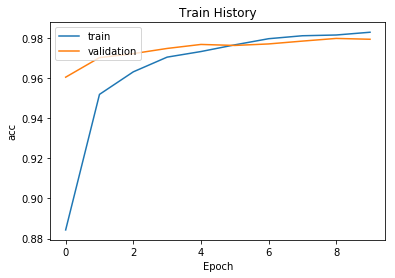

In [27]:
show_train_history(train_history, 'acc', 'val_acc')

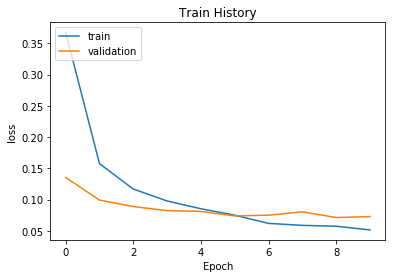

In [28]:
show_train_history(train_history, 'loss', 'val_loss')

## (四) 以test資料評估模型準確率

In [29]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 0s 26us/step

accuracy= 0.9815


<h1 style="background-image: linear-gradient( 135deg, #FFA8A8 10%, #FCFF00 100%);"> D.進行預測 </h1>

## (一) 以x_Test(784)進行預測

In [30]:
prediction = model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## (二)顯示預測結果

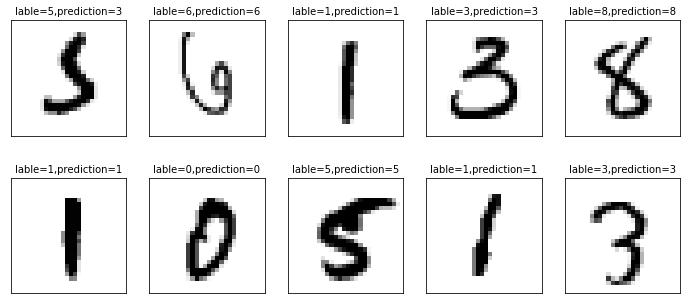

In [31]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340, num=10)

<h1 style="background-image: linear-gradient( 135deg, #5EFCE8 10%, #736EFE 100%);"> E.顯示混淆矩陣 </h1>

## (一) 混淆矩陣(Confusion Matrix)or誤差矩陣(Error Matrix)

In [32]:
import pandas as pd 
pd.crosstab(y_test_label, 
            prediction,
            rownames=['label'],
            colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,0,0,1,1,2,1,1,1
1,0,1129,1,2,0,1,2,0,0,0
2,4,1,1016,2,2,0,2,3,2,0
3,0,0,7,994,0,1,0,4,2,2
4,2,2,1,0,965,0,5,0,0,7
5,2,0,0,14,1,859,5,1,5,5
6,3,2,0,1,3,1,948,0,0,0
7,0,8,6,2,0,0,0,1004,1,7
8,2,0,3,9,3,3,2,3,945,4


## (二)查看誤差列表

In [33]:
df = pd.DataFrame({'label':y_test_label, 'predict': prediction})
df.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [34]:
df[(df.label==5)&(df.predict==3)].head()

,label,predict
340,5,3
674,5,3
1003,5,3
1393,5,3
2035,5,3


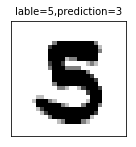

In [35]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=1003, num=1)